In [ ]:
"""
@Author:Kanchan

@Date: 2022-03-03

@Last Modified by:Kanchan

@Title : To create a dataframe from cpulog.csv file using pyspark library, and perform different operations using spark sql and perform visualization for the result.
"""

In [ ]:
import findspark
findspark.init()

In [2]:
from pyspark.sql import *
from pyspark.sql.functions import *
import pyspark.sql.functions as sqlFun
import datetime
spark = SparkSession.builder.getOrCreate()


Using csv cpulog files from hdfs

In [3]:
df= spark.read.option("inferSchema", "true").csv("hdfs://localhost:9000//hive/cpulog*/*.csv", header=True)


In [4]:
print('Rows : ',df.count(), 'Columns : ',len(df.columns))    # total no of row and column

Rows :  5989 Columns :  45


In [5]:
df.show()

+-------------------+---------+----------------+-------------+-----------+----------------+----------------------------------------+---------------------------------+-------------------------------+-----------------------+-----------------------+------------------------+-------------------+------------------+------------------+--------------------+----------------------+---------------------+--------------------+--------------------+----------------------+-----------------+----------------+----------------+---------------+----------------+---------------+----------------+----------------------------+--------------------------+----------------------------+--------------------+------------------------+----------------------+-------------------------+--------------------------------------+------------------------------------+---------------------------------------------------+---------------------------------------------------+-------------------+--------------------+--------+-----+------

In [6]:
df1=df.select("user_name","DateTime","keyboard","mouse")
df1.show()


+--------------------+-------------------+--------+-----+
|           user_name|           DateTime|keyboard|mouse|
+--------------------+-------------------+--------+-----+
| ismpraful@gmail.com|2019-11-17 05:30:01|     0.0|  0.0|
|  sahil24c@gmail.com|2019-11-17 05:30:02|     0.0|  0.0|
|aman.raj251@gmail...|2019-11-17 05:30:01|     0.0|  0.0|
| ismpraful@gmail.com|2019-11-17 05:35:01|     0.0|  0.0|
|  sahil24c@gmail.com|2019-11-17 05:35:01|     0.0|  0.0|
|aman.raj251@gmail...|2019-11-17 05:35:01|     0.0|  0.0|
| ismpraful@gmail.com|2019-11-17 05:40:01|     0.0|  0.0|
|  sahil24c@gmail.com|2019-11-17 05:40:01|     0.0|  0.0|
|aman.raj251@gmail...|2019-11-17 05:40:01|     0.0|  0.0|
| ismpraful@gmail.com|2019-11-17 05:45:02|     0.0|  0.0|
|  sahil24c@gmail.com|2019-11-17 05:45:01|     0.0|  0.0|
|aman.raj251@gmail...|2019-11-17 05:45:02|     0.0|  0.0|
| ismpraful@gmail.com|2019-11-17 05:50:02|     0.0|  0.0|
|  sahil24c@gmail.com|2019-11-17 05:50:02|     0.0|  0.0|
|aman.raj251@g

In [7]:
df2=df1.groupBy("user_name").count()
df2.show(truncate=False)

+-------------------------------+-----+
|user_name                      |count|
+-------------------------------+-----+
|priyagund18@gmail.com          |72   |
|salinabodale73@gmail.com       |569  |
|aman.raj251@gmail.com          |154  |
|gaikwadravi03                  |72   |
|puruissimple@gmail.com         |72   |
|shelkeva@gmail.com             |79   |
|tekina.makin@gmail.com         |44   |
|deepak.63584@gmail.com         |69   |
|sharlawar77@gmail.com          |580  |
|kaleshwetaanil@gmail.com       |74   |
|20150773@dbatu.ac.in           |71   |
|rahilstar11@gmail.com          |551  |
|antonyalexcm@gmail.com         |46   |
|deepshukla292@gmail.com        |565  |
|iamnzm@outlook.com             |614  |
|you@example.com                |101  |
|kalyani24deobhankar@gmail.com  |77   |
|shivanjalisangale5456@gmail.com|71   |
|sahil24c@gmail.com             |153  |
|manojmansukh7@gmail.com        |4    |
+-------------------------------+-----+
only showing top 20 rows



*Calculating Highest and lowest number of average working hours with user name*  

In [8]:
df1.createOrReplaceTempView("student_working")

In [9]:
df3=spark.sql("SELECT user_name, DateTime FROM student_working WHERE keyboard!=0 or mouse!=0")
df3.show(truncate=False)

+-------------------------+-------------------+
|user_name                |DateTime           |
+-------------------------+-------------------+
|puruissimple@gmail.com   |2019-11-17 10:05:01|
|prathameshsalap@gmail.com|2019-11-17 10:05:02|
|puruissimple@gmail.com   |2019-11-17 10:10:01|
|prathameshsalap@gmail.com|2019-11-17 10:10:02|
|puruissimple@gmail.com   |2019-11-17 10:15:01|
|prathameshsalap@gmail.com|2019-11-17 10:15:01|
|puruissimple@gmail.com   |2019-11-17 10:20:01|
|prathameshsalap@gmail.com|2019-11-17 10:20:01|
|puruissimple@gmail.com   |2019-11-17 10:25:01|
|shelkeva@gmail.com       |2019-11-17 10:25:02|
|prathameshsalap@gmail.com|2019-11-17 10:25:01|
|shelkeva@gmail.com       |2019-11-17 10:30:02|
|prathameshsalap@gmail.com|2019-11-17 10:30:01|
|naineshpatil11@gmail.com |2019-11-17 10:30:01|
|puruissimple@gmail.com   |2019-11-17 10:35:01|
|shelkeva@gmail.com       |2019-11-17 10:35:02|
|prathameshsalap@gmail.com|2019-11-17 10:35:02|
|naineshpatil11@gmail.com |2019-11-17 10

In [10]:
df_avg = df1.groupBy('user_name').agg(sqlFun.from_unixtime(sqlFun.avg(sqlFun.unix_timestamp('DateTime')),'hh:mm:ss').alias('avg_time'))
df_avg.show(truncate=False)
#UNIXTIME() returns a date /datetime from a version of unix_timestamp. The return value is in ‘YYYYY-MM-DD HH:MM:SS’ format or YYYYMMDDHHMMSS
# format depending upon the context of the function ( whether numeric or string).

+-------------------------------+--------+
|user_name                      |avg_time|
+-------------------------------+--------+
|priyagund18@gmail.com          |02:02:31|
|salinabodale73@gmail.com       |11:10:06|
|aman.raj251@gmail.com          |11:52:31|
|gaikwadravi03                  |01:57:31|
|puruissimple@gmail.com         |01:02:31|
|shelkeva@gmail.com             |01:40:01|
|tekina.makin@gmail.com         |03:12:31|
|deepak.63584@gmail.com         |02:05:01|
|sharlawar77@gmail.com          |02:02:10|
|kaleshwetaanil@gmail.com       |01:57:31|
|20150773@dbatu.ac.in           |01:59:31|
|rahilstar11@gmail.com          |01:22:09|
|antonyalexcm@gmail.com         |03:07:31|
|deepshukla292@gmail.com        |10:41:53|
|iamnzm@outlook.com             |11:42:00|
|you@example.com                |02:12:16|
|kalyani24deobhankar@gmail.com  |01:50:01|
|shivanjalisangale5456@gmail.com|02:05:01|
|sahil24c@gmail.com             |11:50:11|
|manojmansukh7@gmail.com        |12:02:31|
+----------

In [11]:
df_avg_hours = df_avg.withColumn('avg_hour',(hour(df_avg['avg_time'])*3600 + minute(df_avg['avg_time'])*60 + second(df_avg['avg_time']))/3600)
df_avg_hours.show(truncate=False)

#df_avg_hours.show(truncate=False)
#df4=spark.sql("SELECT user_name,,ROUND((((count)*5)*60),2) as average_sec FROM hours_username")


+-------------------------------+--------+------------------+
|user_name                      |avg_time|avg_hour          |
+-------------------------------+--------+------------------+
|priyagund18@gmail.com          |02:02:31|2.0419444444444443|
|salinabodale73@gmail.com       |11:10:06|11.168333333333333|
|aman.raj251@gmail.com          |11:52:31|11.875277777777777|
|gaikwadravi03                  |01:57:31|1.958611111111111 |
|puruissimple@gmail.com         |01:02:31|1.0419444444444443|
|shelkeva@gmail.com             |01:40:01|1.6669444444444443|
|tekina.makin@gmail.com         |03:12:31|3.2086111111111113|
|deepak.63584@gmail.com         |02:05:01|2.0836111111111113|
|sharlawar77@gmail.com          |02:02:10|2.036111111111111 |
|kaleshwetaanil@gmail.com       |01:57:31|1.958611111111111 |
|20150773@dbatu.ac.in           |01:59:31|1.9919444444444445|
|rahilstar11@gmail.com          |01:22:09|1.3691666666666666|
|antonyalexcm@gmail.com         |03:07:31|3.125277777777778 |
|deepshu

In [12]:
df_avg_hours = df_avg.withColumn('avg_hour',(hour(df_avg['avg_time'])*3600 + minute(df_avg['avg_time'])*60 + second(df_avg['avg_time']))/3600)
df_avg_hours.show(truncate=False)


+-------------------------------+--------+------------------+
|user_name                      |avg_time|avg_hour          |
+-------------------------------+--------+------------------+
|priyagund18@gmail.com          |02:02:31|2.0419444444444443|
|salinabodale73@gmail.com       |11:10:06|11.168333333333333|
|aman.raj251@gmail.com          |11:52:31|11.875277777777777|
|gaikwadravi03                  |01:57:31|1.958611111111111 |
|puruissimple@gmail.com         |01:02:31|1.0419444444444443|
|shelkeva@gmail.com             |01:40:01|1.6669444444444443|
|tekina.makin@gmail.com         |03:12:31|3.2086111111111113|
|deepak.63584@gmail.com         |02:05:01|2.0836111111111113|
|sharlawar77@gmail.com          |02:02:10|2.036111111111111 |
|kaleshwetaanil@gmail.com       |01:57:31|1.958611111111111 |
|20150773@dbatu.ac.in           |01:59:31|1.9919444444444445|
|rahilstar11@gmail.com          |01:22:09|1.3691666666666666|
|antonyalexcm@gmail.com         |03:07:31|3.125277777777778 |
|deepshu

In [13]:
total_avg_work_hours=df_avg_hours.select(avg('avg_hour')).collect()[0][0]
total_avg_work_hours
#collect[0][0] returns the value of the first row & first column.

4.742066993464052

In [14]:
avg_count=df_avg_hours.filter(sqlFun.col("avg_hour")>total_avg_work_hours)
avg_count.count()

10

In [15]:
df_avg_hours.filter(df_avg_hours['avg_hour'] > total_avg_work_hours).select('user_name','avg_hour').show(truncate=False)


+-------------------------+------------------+
|user_name                |avg_hour          |
+-------------------------+------------------+
|salinabodale73@gmail.com |11.168333333333333|
|aman.raj251@gmail.com    |11.875277777777777|
|deepshukla292@gmail.com  |10.698055555555555|
|iamnzm@outlook.com       |11.7              |
|sahil24c@gmail.com       |11.836388888888889|
|manojmansukh7@gmail.com  |12.041944444444445|
|naineshpatil11@gmail.com |10.541944444444445|
|markfernandes66@gmail.com|9.645555555555555 |
|nitishtech.info@gmail.com|10.95861111111111 |
|ismpraful@gmail.com      |11.836388888888889|
+-------------------------+------------------+



In [16]:
df_avg_hours.createOrReplaceTempView("average_working_hour")

In [17]:
spark.sql("SELECT user_name as `user with highest avg hour`,avg_hour FROM average_working_hour WHERE avg_hour = (SELECT MAX(avg_hour) FROM average_working_hour)").show()


+--------------------------+------------------+
|user with highest avg hour|          avg_hour|
+--------------------------+------------------+
|      manojmansukh7@gma...|12.041944444444445|
+--------------------------+------------------+



In [18]:
avg_count = df_avg_hours.filter(sqlFun.col("avg_hour") < total_avg_work_hours)
avg_count.count()

24

In [19]:
df_avg_hours.filter(df_avg_hours['avg_hour'] < total_avg_work_hours).select('user_name','avg_hour').show(truncate=False)


+-------------------------------+------------------+
|user_name                      |avg_hour          |
+-------------------------------+------------------+
|priyagund18@gmail.com          |2.0419444444444443|
|gaikwadravi03                  |1.958611111111111 |
|puruissimple@gmail.com         |1.0419444444444443|
|shelkeva@gmail.com             |1.6669444444444443|
|tekina.makin@gmail.com         |3.2086111111111113|
|deepak.63584@gmail.com         |2.0836111111111113|
|sharlawar77@gmail.com          |2.036111111111111 |
|kaleshwetaanil@gmail.com       |1.958611111111111 |
|20150773@dbatu.ac.in           |1.9919444444444445|
|rahilstar11@gmail.com          |1.3691666666666666|
|antonyalexcm@gmail.com         |3.125277777777778 |
|you@example.com                |2.2044444444444444|
|kalyani24deobhankar@gmail.com  |1.833611111111111 |
|shivanjalisangale5456@gmail.com|2.0836111111111113|
|vaishusawant143@gmail.com      |1.9333333333333333|
|damodharn21@gmail.com          |1.25388888888

In [20]:
spark.sql("SELECT user_name as `user with lowest avg hour`,avg_hour FROM average_working_hour WHERE avg_hour = (SELECT MIN(avg_hour) FROM average_working_hour)").show()


+-------------------------+------------------+
|user with lowest avg hour|          avg_hour|
+-------------------------+------------------+
|     puruissimple@gmai...|1.0419444444444443|
+-------------------------+------------------+



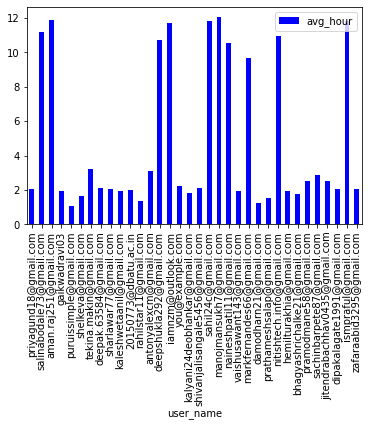

In [21]:
import matplotlib.pyplot as plt
dataframe1=df_avg_hours.toPandas()
dataframe1.plot.bar(x='user_name', y='avg_hour',color = 'b')
plt.show()

In [22]:
data=df.select("user_name","DateTime","keyboard","mouse")
data.show(5,truncate=False)
data.createOrReplaceTempView("not_working_student")

+---------------------+-------------------+--------+-----+
|user_name            |DateTime           |keyboard|mouse|
+---------------------+-------------------+--------+-----+
|ismpraful@gmail.com  |2019-11-17 05:30:01|0.0     |0.0  |
|sahil24c@gmail.com   |2019-11-17 05:30:02|0.0     |0.0  |
|aman.raj251@gmail.com|2019-11-17 05:30:01|0.0     |0.0  |
|ismpraful@gmail.com  |2019-11-17 05:35:01|0.0     |0.0  |
|sahil24c@gmail.com   |2019-11-17 05:35:01|0.0     |0.0  |
+---------------------+-------------------+--------+-----+
only showing top 5 rows



In [23]:
df5=spark.sql("SELECT user_name, DateTime FROM not_working_student WHERE keyboard=0 or mouse=0")
df5.show(truncate=False)

+---------------------+-------------------+
|user_name            |DateTime           |
+---------------------+-------------------+
|ismpraful@gmail.com  |2019-11-17 05:30:01|
|sahil24c@gmail.com   |2019-11-17 05:30:02|
|aman.raj251@gmail.com|2019-11-17 05:30:01|
|ismpraful@gmail.com  |2019-11-17 05:35:01|
|sahil24c@gmail.com   |2019-11-17 05:35:01|
|aman.raj251@gmail.com|2019-11-17 05:35:01|
|ismpraful@gmail.com  |2019-11-17 05:40:01|
|sahil24c@gmail.com   |2019-11-17 05:40:01|
|aman.raj251@gmail.com|2019-11-17 05:40:01|
|ismpraful@gmail.com  |2019-11-17 05:45:02|
|sahil24c@gmail.com   |2019-11-17 05:45:01|
|aman.raj251@gmail.com|2019-11-17 05:45:02|
|ismpraful@gmail.com  |2019-11-17 05:50:02|
|sahil24c@gmail.com   |2019-11-17 05:50:02|
|aman.raj251@gmail.com|2019-11-17 05:50:01|
|sahil24c@gmail.com   |2019-11-17 05:55:01|
|ismpraful@gmail.com  |2019-11-17 05:55:01|
|aman.raj251@gmail.com|2019-11-17 05:55:01|
|ismpraful@gmail.com  |2019-11-17 06:00:01|
|sahil24c@gmail.com   |2019-11-1

*Calculating highest and lowest number of idle hours with user name*    

In [24]:
df5.createOrReplaceTempView("idletime_username")

In [25]:
df_avg_idle = df5.groupBy('user_name').agg(sqlFun.from_unixtime(sqlFun.avg(sqlFun.unix_timestamp('DateTime')),'hh:mm:ss').alias('avg_idle_time'))
df_avg_idle.show(truncate=False)

+-------------------------------+-------------+
|user_name                      |avg_idle_time|
+-------------------------------+-------------+
|priyagund18@gmail.com          |02:03:01     |
|salinabodale73@gmail.com       |05:53:27     |
|aman.raj251@gmail.com          |11:52:31     |
|gaikwadravi03                  |01:45:22     |
|puruissimple@gmail.com         |12:22:15     |
|shelkeva@gmail.com             |01:53:43     |
|tekina.makin@gmail.com         |03:12:31     |
|deepak.63584@gmail.com         |02:14:07     |
|sharlawar77@gmail.com          |02:50:59     |
|kaleshwetaanil@gmail.com       |02:03:54     |
|20150773@dbatu.ac.in           |01:59:31     |
|rahilstar11@gmail.com          |03:33:34     |
|antonyalexcm@gmail.com         |03:12:31     |
|deepshukla292@gmail.com        |11:06:26     |
|iamnzm@outlook.com             |02:48:12     |
|you@example.com                |01:19:46     |
|kalyani24deobhankar@gmail.com  |01:50:01     |
|shivanjalisangale5456@gmail.com|02:15:5

In [26]:
df_avg_idle_hours = df_avg_idle.withColumn('avg_idle_hour',(hour(df_avg_idle['avg_idle_time'])*3600 + minute(df_avg_idle['avg_idle_time'])*60 + second(df_avg_idle['avg_idle_time']))/3600)
df_avg_idle_hours.show(truncate=False)

+-------------------------------+-------------+------------------+
|user_name                      |avg_idle_time|avg_idle_hour     |
+-------------------------------+-------------+------------------+
|priyagund18@gmail.com          |02:03:01     |2.0502777777777776|
|salinabodale73@gmail.com       |05:53:27     |5.890833333333333 |
|aman.raj251@gmail.com          |11:52:31     |11.875277777777777|
|gaikwadravi03                  |01:45:22     |1.7561111111111112|
|puruissimple@gmail.com         |12:22:15     |12.370833333333334|
|shelkeva@gmail.com             |01:53:43     |1.8952777777777778|
|tekina.makin@gmail.com         |03:12:31     |3.2086111111111113|
|deepak.63584@gmail.com         |02:14:07     |2.2352777777777777|
|sharlawar77@gmail.com          |02:50:59     |2.8497222222222223|
|kaleshwetaanil@gmail.com       |02:03:54     |2.065             |
|20150773@dbatu.ac.in           |01:59:31     |1.9919444444444445|
|rahilstar11@gmail.com          |03:33:34     |3.5594444444444

In [27]:
total_avg_idle_hours=df_avg_idle_hours.select(avg('avg_idle_hour')).collect()[0][0]
total_avg_idle_hours

4.923468013468014

In [28]:
avg_idle_count=df_avg_idle_hours.filter(sqlFun.col("avg_idle_hour")>total_avg_idle_hours)
avg_idle_count.count()

10

In [29]:
df_avg_idle_hours.createOrReplaceTempView("average_idle_hour")

In [30]:
spark.sql("SELECT user_name as `user with highest avg idle hour`,avg_idle_hour FROM average_idle_hour WHERE avg_idle_hour = (SELECT MAX(avg_idle_hour) FROM average_idle_hour)").show()


+-------------------------------+------------------+
|user with highest avg idle hour|     avg_idle_hour|
+-------------------------------+------------------+
|           damodharn21@gmail...|12.430277777777778|
+-------------------------------+------------------+



In [31]:
spark.sql("SELECT user_name as `user with lowest avg idle hour`,avg_idle_hour FROM average_idle_hour WHERE avg_idle_hour = (SELECT MIN(avg_idle_hour) FROM average_idle_hour)").show()


+------------------------------+------------------+
|user with lowest avg idle hour|     avg_idle_hour|
+------------------------------+------------------+
|               you@example.com|1.3294444444444444|
+------------------------------+------------------+



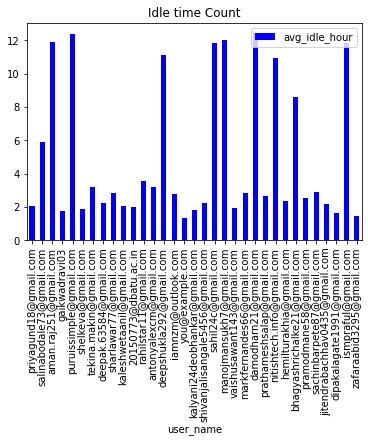

In [32]:
import matplotlib.pyplot as plt 
dataframe2=df_avg_idle_hours.toPandas()
dataframe2.plot.bar(x='user_name',y='avg_idle_hour',color='blue')
plt.title("Idle time Count")
plt.show()